### Exercise Session 7 – January 13, 2025

Plan for today:
* Course Evaluation
* Questions?
* Project status
* Lecture content refresher

In [2]:
import numpy as np
import librosa
import soundfile as sf

import matplotlib.pyplot as plt
import IPython.display as ipd

In [3]:
f1 = np.array([ 371.05768333,  737.2320888 , 1103.85911735, 1469.87405813,
               1836.16188371, 2202.69923792, 2566.85923114, 2931.02001518,
               3301.20394052, 3683.53044491, 4029.46991549, 4406.93176255,
               4772.26834134, 5149.5013867 , 5523.47695547, 5876.79700097,
               6250.4537991 , 6604.70498974, 6984.92921264, 7345.72000003])
a1 = np.array([0.23535205, 0.02144241, 0.1710612 , 0.07176546, 0.0200525 ,
               0.0136764 , 0.02634448, 0.00393117, 0.00582688, 0.0009876 ,
               0.00071378, 0.00075619, 0.00106608, 0.00102245, 0.00068489,
               0.00025205, 0.00102093, 0.00054437, 0.00029824, 0.00027595])

f2 = np.array([ 371.57358959,  747.93219602, 1115.15898192, 1481.81747029,
               1856.88336554, 2221.92533645, 2590.42791601, 2975.30099267,
               3343.12669493, 3712.54060792,    0.        , 4444.04557213,
               4828.04751644, 5189.63276691, 5567.05837772, 5938.25139375,
               6301.16253923, 6663.61705254, 7061.02443371, 7439.52915991])
a2 = np.array([1.81469859e-01, 9.12917209e-02, 6.97066526e-02, 7.42612118e-03,
               6.30399477e-03, 4.83819767e-03, 1.61668837e-03, 6.88017062e-04,
               4.15268040e-04, 2.79277958e-04, 0.00000000e+00, 2.19072743e-04,
               1.01617965e-04, 7.48078406e-05, 4.39559896e-05, 4.70787806e-05,
               3.43264222e-05, 4.26258813e-05, 6.69303299e-06, 6.32251077e-06])

fs = 44100.
L = int(3 * fs)

t = np.arange(L) / fs

x1 = np.zeros(L)
x2 = np.zeros(L)

for i in range(len(f1)):
    x1 += a1[i] * np.sin(2 * np.pi * f1[i] * 2**(4/12) * t)
    x2 += a2[i] * np.sin(2 * np.pi * f2[i] * t)
    
ipd.display(ipd.Audio(x1, rate=fs))
ipd.display(ipd.Audio(x2, rate=fs))

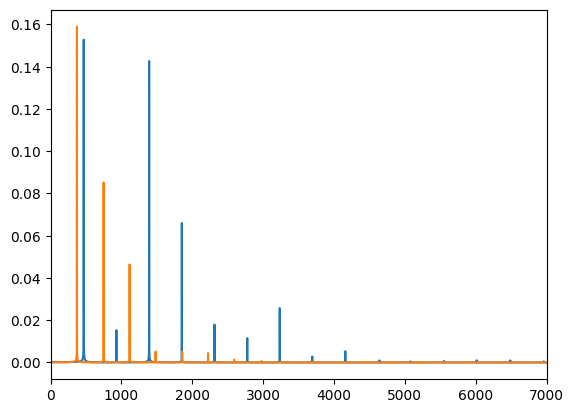

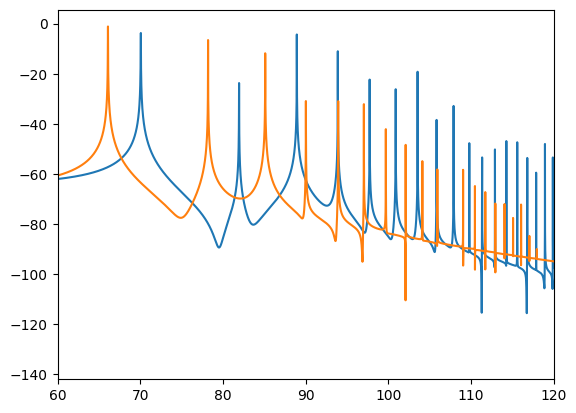

In [4]:
X1 = np.abs(np.fft.rfft(x1))
X2 = np.abs(np.fft.rfft(x2))

X1 = X1 / L * 2
X2 = X2 / L * 2

f_fft = np.fft.rfftfreq(L, 1/fs)

plt.plot(f_fft, X1)
plt.plot(f_fft, X2)
plt.xlim(0, 7000)
plt.show()

midi = 12 * np.log2(f_fft[1:] / 440) + 69
# midi = midi % 12

X1_dB = 20 * np.log10(X1 / np.max(a1))
X2_dB = 20 * np.log10(X2 / np.max(a2))

plt.plot(midi, X1_dB[1:])
plt.plot(midi, X2_dB[1:])
plt.xlim(60, 120)
plt.show()

In [5]:
midi = 60
f_midi = 440 * 2**((midi - 69)/12)
midi_inv = 12 * np.log2(f_midi / 440) + 69
print(f_midi)
print(midi_inv)

261.6255653005986
60.0


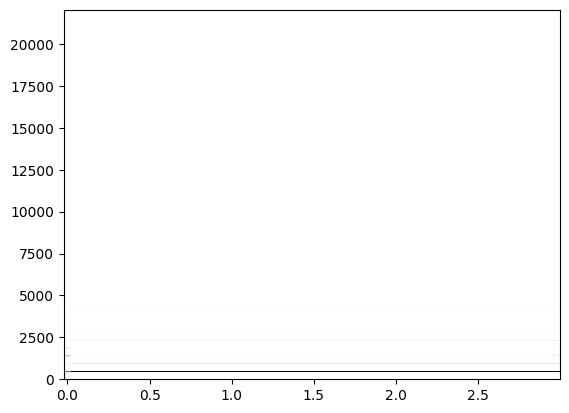

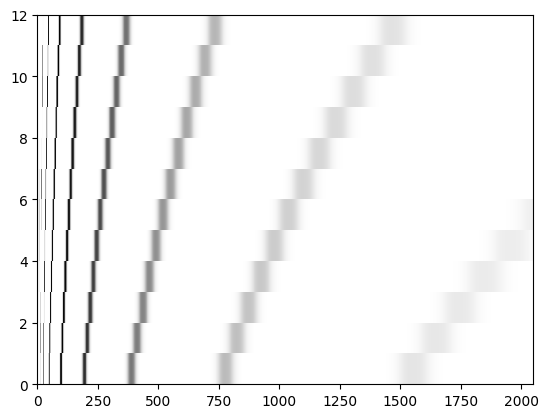

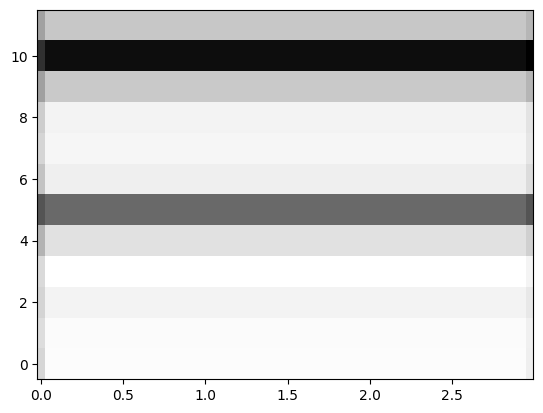

In [6]:
N = 4096
H = N // 2

X1 = np.abs(librosa.stft(x1, n_fft=N, hop_length=H))
t = np.arange(X1.shape[1]) * H / fs
f = np.arange(X1.shape[0]) * fs / N

D = librosa.filters.chroma(sr=fs, n_fft=N)

C = D @ X1

plt.pcolormesh(t, f, X1, cmap="gray_r")
plt.show()

plt.pcolormesh(D, cmap="gray_r")
plt.show()

plt.pcolormesh(t, np.arange(12), C, cmap="gray_r")
plt.show()

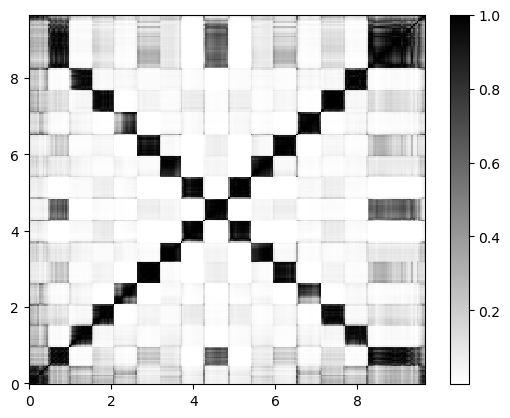

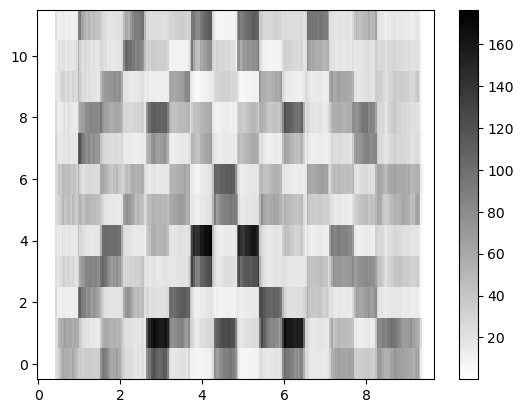

In [16]:
x, fs = sf.read("trumpet_scale.wav")
# x, fs = librosa.load("/Users/typo/toniCloud/Signals/trumpet_scale.wav", mono=True)
# x = x[:,0]
# x = x[:int(90 * fs)]

ipd.display(ipd.Audio(x, rate=fs))

X = np.abs(librosa.stft(x, n_fft=N, hop_length=H))
C = D @ X

SSM = np.zeros((C.shape[1], C.shape[1]))

t = np.arange(X.shape[1]) * H / fs

for i in range(C.shape[1]):
    for j in range(C.shape[1]):
        SSM[i,j] = np.dot(C[:,i], C[:,j]) / (np.linalg.norm(C[:,i]) * np.linalg.norm(C[:,j]) + 1e-8)
        
plt.pcolormesh(t, t, SSM ** 10, cmap="gray_r")
plt.colorbar()
plt.show()

plt.pcolormesh(t, np.arange(12), C, cmap="gray_r")
plt.colorbar()
plt.show()